# Boundaries Preprocess

In [1]:
import geopandas as gpd

# 读取 shapefile
grids_shp_path = "/home/liyong/code/CityHomogeneity/data/UrbanBoundaries/preprocess_city49/hexagon.shp"
grids_gdf = gpd.read_file(grids_shp_path)

# # 修改列名并将其转换为整型
grids_gdf = grids_gdf.rename(columns={"id": "gridID"})
grids_gdf["gridID"] = grids_gdf["gridID"].astype(int)

# # 输出修改后的文件
output_path = "/home/liyong/code/CityHomogeneity/data/UrbanBoundaries/preprocess_city49/hexagon.shp"
grids_gdf.to_file(output_path)

# print(f"Modified shapefile saved to: {output_path}")
grids_gdf


,gridID,left,top,right,bottom,geometry
0,1174215,116.580601,39.557853,116.592610,39.547453,"POLYGON ((116.58060 39.55265, 116.58360 39.557..."
1,1174216,116.580601,39.547453,116.592610,39.537053,"POLYGON ((116.58060 39.54225, 116.58360 39.547..."
2,1174217,116.580601,39.537053,116.592610,39.526653,"POLYGON ((116.58060 39.53185, 116.58360 39.537..."
3,1174218,116.580601,39.526653,116.592610,39.516253,"POLYGON ((116.58060 39.52145, 116.58360 39.526..."
4,1174219,116.580601,39.516253,116.592610,39.505853,"POLYGON ((116.58060 39.51105, 116.58360 39.516..."
...,...,...,...,...,...,...
519711,910986,115.409735,40.691453,115.421744,40.681053,"POLYGON ((115.40973 40.68625, 115.41274 40.691..."
519712,910987,115.409735,40.681053,115.421744,40.670653,"POLYGON ((115.40973 40.67585, 115.41274 40.681..."
519713,910988,115.409735,40.670653,115.421744,40.660253,"POLYGON ((115.40973 40.66545, 115.41274 40.670..."
519714,910989,115.409735,40.660253,115.421744,40.649853,"POLYGON ((115.40973 40.65505, 115.41274 40.660..."


In [2]:
import geopandas as gpd

# 读取 shapefile
grids_shp_path = "/home/liyong/code/CityHomogeneity/data/UrbanBoundaries/preprocess_city49/merged_with_boundaries_county.shp"
grids_gdf = gpd.read_file(grids_shp_path)
len(grids_gdf['NAME_3'].unique())

440

In [ ]:
import geopandas as gpd

# 更新文件路径
county_shp_path = "/home/liyong/code/CityHomogeneity/data/UrbanBoundaries/preprocess_city49/merged_with_boundaries_county.shp"

output_shp_path = "/home/liyong/code/CityHomogeneity/data/baidu/V3/all_cities_hexagons_with_county.shp"

# 读取 Shapefile 文件
county_gdf = gpd.read_file(county_shp_path)


# 只保留县级数据的 NAME_1, NAME_2, NAME_3 和 geometry 列
county_gdf = county_gdf[["NAME_1", "NAME_2", "NAME_3","geometry"]]

# 执行空间连接
grids_with_county = gpd.sjoin(grids_gdf, county_gdf, how="left", predicate="intersects")

# 保存结果为新的 Shapefile
grids_with_county.to_file(output_shp_path)
len(county_gdf)

/tmp/ipykernel_34242/1501172411.py:19: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  grids_with_county.to_file(output_shp_path)


455

In [62]:
import geopandas as gpd

# 更新文件路径
city_shp_path = "/home/liyong/code/CityHomogeneity/data/UrbanBoundaries/preprocess_city49/merged_with_boundaries_city_dissolve.shp"

output_shp_path = "/home/liyong/code/CityHomogeneity/data/baidu/V3/all_cities_hexagons_with_city.shp"

# 读取 Shapefile 文件
city_gdf = gpd.read_file(city_shp_path)


# 只保留县级数据的 NAME_1, NAME_2,
city_gdf = city_gdf[["NAME_1", "NAME_2", "geometry"]]
city_gdf = city_gdf[city_gdf["NAME_1"].notna()]
# 执行空间连接
grids_with_city = gpd.sjoin(grids_gdf, city_gdf, how="inner", predicate="intersects")

# 保存结果为新的 Shapefile
grids_with_city.to_file(output_shp_path)
len(grids_with_city)

/tmp/ipykernel_105739/2086974389.py:19: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  grids_with_city.to_file(output_shp_path)


165858

In [65]:
grids_with_city[grids_with_city['NAME_2']=='Taizhou(ZJ)']

,gridID,left,top,right,bottom,geometry,index_right,NAME_1,NAME_2
265477,2120476,120.786713,28.601453,120.798722,28.591053,"POLYGON ((120.78671 28.59625, 120.78972 28.601...",46,Zhejiang,Taizhou(ZJ)
265478,2120477,120.786713,28.591053,120.798722,28.580653,"POLYGON ((120.78671 28.58585, 120.78972 28.591...",46,Zhejiang,Taizhou(ZJ)
265479,2120478,120.786713,28.580653,120.798722,28.570253,"POLYGON ((120.78671 28.57545, 120.78972 28.580...",46,Zhejiang,Taizhou(ZJ)
265501,2122499,120.795720,28.617053,120.807729,28.606653,"POLYGON ((120.79572 28.61185, 120.79872 28.617...",46,Zhejiang,Taizhou(ZJ)
265502,2122500,120.795720,28.606653,120.807729,28.596253,"POLYGON ((120.79572 28.60145, 120.79872 28.606...",46,Zhejiang,Taizhou(ZJ)
...,...,...,...,...,...,...,...,...,...
350126,2363336,121.867513,28.809453,121.879522,28.799053,"POLYGON ((121.87185 28.80352, 121.87186 28.803...",46,Zhejiang,Taizhou(ZJ)
350134,2375488,121.921553,28.726253,121.933562,28.715853,"POLYGON ((121.92473 28.72049, 121.92751 28.721...",46,Zhejiang,Taizhou(ZJ)
350135,2375489,121.921553,28.715853,121.933562,28.705453,"POLYGON ((121.92452 28.71295, 121.92198 28.711...",46,Zhejiang,Taizhou(ZJ)
350140,2377512,121.930560,28.731453,121.942568,28.721053,"POLYGON ((121.93724 28.72416, 121.93768 28.723...",46,Zhejiang,Taizhou(ZJ)


# Sjoin metadata features and assign grid id

In [21]:
import pandas as pd 

df = pd.read_csv("/home/liyong/code/CityHomogeneity/output/baidu/V3/test_loss_feature_ep299.csv")
print(df.head(5))

metadata = pd.read_csv('/home/liyong/code/CityHomogeneity/data/baidu/V3/merged_test_sv.csv')
print(metadata.head(5))
# 删除 df 中的 'image-name' 列
df = df.drop(columns=['image_name'])

# 按照行顺序直接拼接（注意这里基于行索引）
merged_df = pd.concat([metadata, df], axis=1)
# merged_df = merged_df.drop(columns=['index_right'])
# 查看合并后的结果
print(merged_df.columns)
merged_df.to_pickle("/home/liyong/code/CityHomogeneity/output/baidu/V3/test_loss_feature_allcity_ep299.pkl")

   image_name      loss  feature_0  feature_1  feature_2  feature_3  \
0  254286_115  4.278286  -0.126128   1.260631  -0.559336  -0.737484   
1   37322_115  4.188665  -0.163882   1.056059  -0.326458  -0.674454   
2   38503_115  4.168523  -0.333249   1.483576  -0.231713  -0.868839   
3  291212_115  4.238930  -0.303481   1.303544  -0.389397  -0.875815   
4  291219_115  4.282091  -0.203746   1.060453  -0.327222  -0.737381   

   feature_4  feature_5  feature_6  feature_7  ...  feature_374  feature_375  \
0   0.456771   0.539508  -0.633227  -0.036153  ...    -0.565657    -0.786938   
1   0.536052   0.625863  -0.604776   0.133287  ...    -0.396480    -0.605097   
2   0.563148   0.704924  -0.657962  -0.047016  ...    -0.466351    -0.692135   
3   0.473966   0.732075  -0.750770  -0.172658  ...    -0.396453    -0.767536   
4   0.460029   0.651019  -0.785619   0.035335  ...    -0.431258    -0.653046   

   feature_376  feature_377  feature_378  feature_379  feature_380  \
0     0.264795    -0.7

In [ ]:
import pandas as pd 

df = pd.read_csv("/home/liyong/code/CityHomogeneity/output/baidu/V3/train_loss_feature_ep299.csv")
print(df.head(5))

metadata = pd.read_csv('/home/liyong/code/CityHomogeneity/data/baidu/V3/merged_train_sv.csv')
print(metadata.head(5))
# 删除 df 中的 'image-name' 列
df = df.drop(columns=['image_name'])

# 按照行顺序直接拼接（注意这里基于行索引）
merged_df = pd.concat([metadata, df], axis=1)
# merged_df = merged_df.drop(columns=['index_right'])
# 查看合并后的结果

merged_df.to_pickle("/home/liyong/code/CityHomogeneity/output/baidu/V3/train_loss_feature_allcity_ep299.pkl")
print(merged_df.columns)

  image_name      loss  feature_0  feature_1  feature_2  feature_3  feature_4  \
0  16066_120  4.185853  -0.134650   1.089988  -0.370036  -0.690977   0.425214   
1  16058_120  4.175595  -0.262588   1.349272  -0.311763  -0.774805   0.570884   
2  16055_120  4.157238  -0.013069   1.160699  -0.699369  -0.772088   0.317809   
3  16069_120  4.180566  -0.201432   1.185143  -0.309070  -0.764865   0.599609   
4  16059_120  4.172803  -0.195282   1.228694  -0.390344  -0.751031   0.611108   

   feature_5  feature_6  feature_7  ...  feature_374  feature_375  \
0   0.657239  -0.766154   0.043181  ...    -0.366946    -0.606227   
1   0.705469  -0.688038  -0.011048  ...    -0.387283    -0.720381   
2   0.709457  -0.561422  -0.270125  ...    -0.647691    -0.949657   
3   0.680904  -0.617074  -0.018392  ...    -0.392217    -0.673670   
4   0.674170  -0.718799  -0.086960  ...    -0.398481    -0.710680   

   feature_376  feature_377  feature_378  feature_379  feature_380  \
0     0.305386    -0.796455 

# Merge loss to grid

In [ ]:
##可视化autoencode的 相似结果
# extract feature

import pandas as pd
import numpy as np
#from PIL import Image
import matplotlib.pyplot as plt
#%matplotlib inline
from matplotlib.colors import Normalize
from matplotlib import cm
import matplotlib

import seaborn as sns
from fiona.crs import from_epsg
from shapely.geometry import Point, Polygon

from tqdm import tqdm
import geopandas as gpd
from shapely.geometry import Polygon
import numpy as np
import os
from pyproj import CRS

from sklearn.metrics.pairwise import cosine_similarity
# from sklearn.cluster import DBSCAN
import argparse

import time
colors = sns.color_palette()
blue = colors[0]
amber = colors[1]
green = colors[2]

import datetime,gc


def visual_city_v3(city,lossDF,grids_city,status='test',epoch=200,level = 'county_level'):
    scales = [1000]
        # 将 lossDF 转换为 GeoDataFrame
    loss_gdf = gpd.GeoDataFrame(
        lossDF,
        geometry=gpd.points_from_xy(lossDF.longitude, lossDF.latitude),
        crs="EPSG:4326"
    )

    # 空间连接，将点匹配到网格
    joined = gpd.sjoin(loss_gdf, grids_city, how="inner", predicate="intersects")

    # 计算每个网格的平均 loss
    grid_loss_avg = joined.groupby("gridID").agg({"homogeneity": "mean"}).reset_index()

    # 将平均 loss 加回到 grids_city 中
    grids_city_with_loss = grids_city.merge(grid_loss_avg, on="gridID", how="left")

    # 删除没有点的网格
    grids_city_with_loss = grids_city_with_loss.dropna(subset=["homogeneity"])

    fig, ax = plt.subplots(figsize=(10,10))

    
    file_path = f'output/baidu/V3/results/{status}/shp/{city}/Hexagon_{scales[0]}_epoch_{epoch}_{level}_homogeneity.shp'

    folder_path = os.path.dirname(file_path)
    if not os.path.exists(folder_path):
        os.makedirs(folder_path)

    grids_city_with_loss.to_file(file_path, driver='ESRI Shapefile', encoding='utf-8')
    print(len(grids_city_with_loss))
  
    colormap = plt.get_cmap('Spectral') #summer  Spectral_r
    grids_city_with_loss.to_crs(3857).plot(ax = ax, linewidth=0, categorical = False, column = 'homogeneity',
                cmap =  colormap, edgecolor = 'grey', alpha=1,legend=False)
    ax.set_xticks([])
    ax.set_yticks([])
    sns.despine(left=True, bottom=True)
    
    # #  color bar
    # norm_color=plt.Normalize(vmin=min(plotDF.loss),vmax=max(plotDF.loss))
    norm_color=plt.Normalize(vmin=3.8,vmax=4.6)
    n_cmap=matplotlib.cm.ScalarMappable(norm=norm_color,cmap =colormap)
    n_cmap.set_array([])
    cbar_ax = fig.add_axes([0.90, 0.25, 0.02, 0.3])
    clb=fig.colorbar(n_cmap, cax=cbar_ax) 

    # plotDF.show()
    file_path_png = f"output/baidu/V3/results/{status}/mae1/Hexagon_{city}_{scales[0]}_epoch_{epoch}_{level}_homogeneity.png"
    # 检查目录是否存在，如果不存在则创建
    folder_path_png = os.path.dirname(file_path_png)
    if not os.path.exists(folder_path_png):
        os.makedirs(folder_path_png)
    fig.savefig(file_path_png, dpi=300, bbox_inches='tight')
    print(file_path_png)
    fig.clf()



## Only City Level

In [ ]:
#test
path="/home/liyong/code/CityHomogeneity/output/baidu/V3/test_loss_feature_allcity_300ep.pkl"
df_loss = pd.read_pickle(path)
print(df_loss.columns)
grids_with_citys = "/home/liyong/code/CityHomogeneity/data/baidu/V3/all_cities_hexagons_with_city.shp"
# 读取 Shapefile 文件
grids_with_citys = gpd.read_file(grids_with_citys)
print(grids_with_citys.columns)
for city, group in df_loss.groupby('city'):
    print(city)
    grids_city = grids_with_citys[grids_with_citys['NAME_2'].str.lower() == city.lower()]
    visual_city_v3(city,group,grids_city,status='test',epoch=300,level = 'city_level')

In [4]:
#train

path="/home/liyong/code/CityHomogeneity/output/baidu/V3/train_loss_feature_allcity_300ep_homogeneity.pkl"
df_loss = pd.read_pickle(path)
print(df_loss.columns)
grids_with_citys = "/home/liyong/code/CityHomogeneity/data/baidu/V3/all_cities_hexagons_with_city.shp"
# 读取 Shapefile 文件
grids_with_citys = gpd.read_file(grids_with_citys)
print(grids_with_citys.columns)


Index(['loss', 'loss_normalized', 'homogeneity', 'sid', 'image_name',
       'latitude', 'longitude', 'date', 'value', 'path',
       ...
       'feature_374', 'feature_375', 'feature_376', 'feature_377',
       'feature_378', 'feature_379', 'feature_380', 'feature_381',
       'feature_382', 'feature_383'],
      dtype='object', length=395)
Index(['gridID', 'left', 'top', 'right', 'bottom', 'index_righ', 'NAME_1',
       'NAME_2', 'geometry'],
      dtype='object')


In [70]:
# 创建几何对象（Point）
geometry = [Point(xy) for xy in zip(df_loss['longitude'], df_loss['latitude'])]

# 转换为 GeoDataFrame
gdf_loss = gpd.GeoDataFrame(
    df_loss,
    geometry=geometry,
    crs="EPSG:4326"  # WGS84坐标系统
)

# 确保 grids_with_citys 的CRS一致
grids_with_citys = grids_with_citys.to_crs("EPSG:4326")

# 空间连接（保留能匹配的df_loss数据）
df_joined = gpd.sjoin(
    gdf_loss,
    grids_with_citys[["NAME_1", "NAME_2", "geometry"]],  # 只保留需要的列
    how="left",  # 保留所有df_loss数据，未匹配的NAME_1/NAME_2为NaN
    predicate="within"  # 或 "intersects"，根据需求选择
)

# 检查未匹配的数据（可选）
print("未匹配的数据量:", df_joined[df_joined["NAME_1"].isna()].shape[0])

# 删除多余的列（如 index_right）
df_joined = df_joined.drop(columns=["index_right"])

# 保存结果（可选）
path2="/home/liyong/code/CityHomogeneity/output/baidu/V3/train_loss_feature_allcity_300ep_homogeneity_name.pkl"
df_joined.to_pickle(path2)

未匹配的数据量: 62281


In [ ]:
path2="/home/liyong/code/CityHomogeneity/output/baidu/V3/train_loss_feature_allcity_300ep_homogeneity_name.pkl"
df_loss = pd.read_pickle(path2)
grids_with_citys = "/home/liyong/code/CityHomogeneity/data/baidu/V3/all_cities_hexagons_with_city.shp"
# 读取 Shapefile 文件
grids_with_citys = gpd.read_file(grids_with_citys)
for city, group in df_loss.groupby('city'):

        grids_city = grids_with_citys[grids_with_citys['NAME_2'] == city]
        print(city,len(grids_city))
        visual_city_v3(city,group,grids_city,status='train',epoch=300,level = 'city_level')

In [10]:
grids_example = "/home/liyong/code/CityHomogeneity/output/baidu/V3/results/train/shp/Anqing/Hexagon_1000_epoch_300_city_level_homogeneity.shp"
# 读取 Shapefile 文件
grids_example = gpd.read_file(grids_example)
print(grids_example.columns)


Index(['gridID', 'left', 'top', 'right', 'bottom', 'index_righ', 'NAME_1',
       'NAME_2', 'homogeneit', 'geometry'],
      dtype='object')


In [11]:
grids_example['homogeneit']

0      0.433251
1      0.405188
2      0.585350
3      0.494785
4      0.484558
         ...   
116    0.460374
117    0.507338
118    0.422341
119    0.469156
120    0.471392
Name: homogeneit, Length: 121, dtype: float64

## County Level

In [ ]:
#test
path="/home/liyong/code/CityHomogeneity/output/baidu/V3/test_loss_feature_allcity_300ep.pkl"
df_loss = pd.read_pickle(path)
print(df_loss.columns)
grids_with_citys = "/home/liyong/code/CityHomogeneity/data/baidu/V3/all_cities_grids_with_county.shp"
# 读取 Shapefile 文件
grids_with_citys = gpd.read_file(grids_with_citys)
print(grids_with_citys.columns)
for city, group in df_loss.groupby('city'):
    print(city)
    grids_city = grids_with_citys[grids_with_citys['city']==city]
    visual_city_v3(city,group,grids_city,status='test',epoch=300,level = 'county_level')

In [ ]:
#train
path="/home/liyong/code/CityHomogeneity/output/baidu/V3/train_loss_feature_allcity_300ep.pkl"
df_loss = pd.read_pickle(path)
print(df_loss.columns)
grids_with_citys = "/home/liyong/code/CityHomogeneity/data/baidu/V3/all_cities_grids_with_county.shp"
# 读取 Shapefile 文件
grids_with_citys = gpd.read_file(grids_with_citys)
print(grids_with_citys.columns)
for city, group in df_loss.groupby('city'):
    print(city)
    grids_city = grids_with_citys[grids_with_citys['city']==city]
    visual_city_v3(city,group,grids_city,status='train',epoch=300,level = 'county_level')

# Visualization

## City Level Grid

In [ ]:
# 根据人口排序
import matplotlib.pyplot as plt
import geopandas as gpd
import matplotlib as mpl
import pandas as pd

path = path="/home/liyong/code/CityHomogeneity/output/baidu/V3/train_loss_feature_allcity_300ep.pkl"
df = pd.read_pickle(path)

max_loss = df["loss"].max()
min_loss = df["loss"].min()
print(min_loss,max_loss)

3.689868 4.69167


shanghai
beijing
guangzhou
shenzhen
tianjin
suzhou
baoding
hangzhou
shijiazhuang
dongguan
handan
wenzhou
nanjing
foshan
ningbo
hefei
tangshan
nantong
wuxi
xingtai
cangzhou
yancheng
taizhou
huizhou
jinhua
shaoxing
langfang
changzhou
jiaxing
jiangmen
anqing
tayzhou
yangzhou
hengshui
zhangjiakou
zhongshan
zhaoqing
chuzhou
wuhu
maanshan
chengde
zhenjiang
qinhuangdao
huzhou
xuancheng
zhuhai
chizhou
tongling
zhoushan


/tmp/ipykernel_1952/3663041722.py:51: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


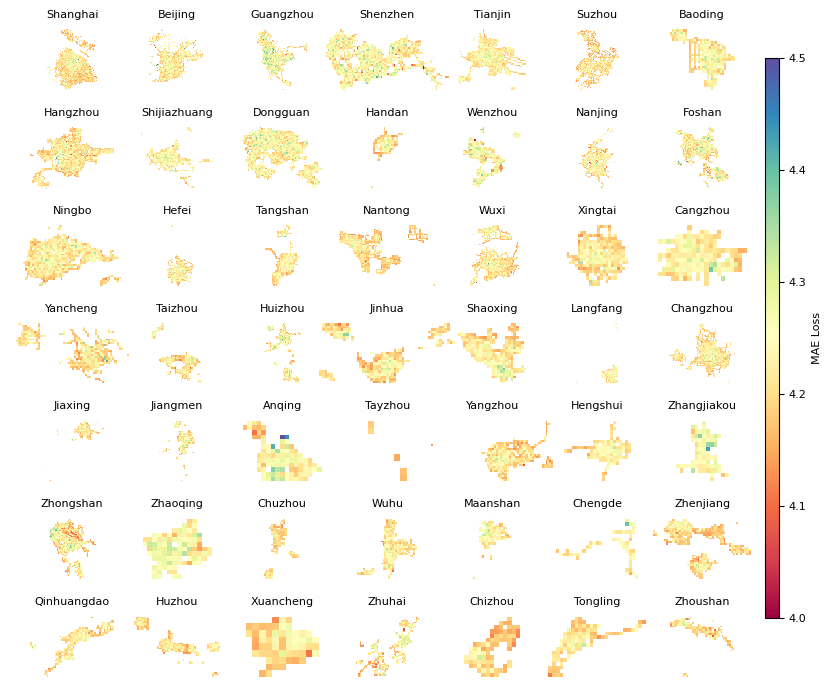

In [ ]:
# 创建一个足够大的画布
# 设置默认单位为厘米
mpl.rcParams['figure.figsize'] = [9, 7] 
fig, axes = plt.subplots(7, 7)



savepath = '/home/liyong/code/CityHomogeneity/output/baidu/V3/visresult'
# 为所有城市设置相同的颜色映射
norm = plt.Normalize(vmin=4.0, vmax=4.5)
cmap = 'Spectral'
# cl2= ['ZhaoQing', 'ChengDe', 'tongling', 'chizhou', 'ZhangJiaKou', 'anqing', 'LangFang', 'chuzhou', 'xuancheng', 'JiangMen', 'DongGuan', 'changzhou', 'HuiZhou', 'GuangZhou', 'HengShui', 'zhoushan', 'ShiJiaZhuang', 'tayzhou', 'ningbo', 'maanshan', 'wenzhou', 'jiaxing', 'hangzhou', 'beijing', 'Handan', 'nanjing', 'huzhou', 'ZhongShan', 'BaoDing', 'zhenjiang', 'hefei', 'ShenZhen', 'wuhu', 'ZhuHai', 'FoShan', 'nantong', 'yancheng', 'shaoxing', 'wuxi', 'shanghai', 'TianJin', 'jinhua', 'taizhou', 'yangzhou', 'XingTai', 'TangShan', 'CangZhou', 'suzhou', 'QinHuangDao']
cl2 = ['shanghai', 'beijing', 'GuangZhou', 'ShenZhen', 'TianJin', 'suzhou', 'BaoDing', 'hangzhou', 'ShiJiaZhuang', 'DongGuan', 'Handan', 'wenzhou', 'nanjing', 'FoShan', 'ningbo', 'hefei', 'TangShan', 'nantong', 'wuxi', 'XingTai', 'CangZhou', 'yancheng', 'taizhou', 'HuiZhou', 'jinhua', 'shaoxing', 'LangFang', 'changzhou', 'jiaxing', 'JiangMen', 'anqing', 'tayzhou', 'yangzhou', 'HengShui', 'ZhangJiaKou', 'ZhongShan', 'ZhaoQing', 'chuzhou', 'wuhu', 'maanshan', 'ChengDe', 'zhenjiang', 'QinHuangDao', 'huzhou', 'xuancheng', 'ZhuHai', 'chizhou', 'tongling', 'zhoushan']

# 遍历每个城市的网格图并将其放置在画布上的适当位置
for i, city in enumerate(cl2):
    city = city.lower()
    print(city)
    # 计算当前城市应该放置在画布的哪个位置
    row = i // 7  # 行数
    col = i % 7   # 列数
    
    # 读取城市的网格图
    grid_shp_path =  f'output/baidu/V3/results/train/shp/{city}/Grid_1000_epoch_300_city_level_loss.shp'
    city_grid = gpd.read_file(grid_shp_path)
    
    # 绘制城市的网格图
    ax = axes[row, col]
    city_grid.plot(ax=ax, linewidth=0, categorical=False, column='loss', cmap=cmap, edgecolor='grey', alpha=1, legend=False, norm=norm)
    
    # 隐藏坐标轴和边框
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_frame_on(False)
    
    # 添加城市名称作为子图标题
    ax.set_title(city.capitalize(),fontsize=8)

# # 调整子图布局以留出足够的空间放置色标
plt.subplots_adjust(right=2.5)  # 可根据需要调整 right 的值
cax = fig.add_axes([0.92, 0.11, 0.015, 0.8]) # 色标放置的位置和大小  左、底、宽度和高度
sm = plt.cm.ScalarMappable(cmap='Spectral', norm=norm)
sm._A = []  # 色标必须有一个虚拟的映射数组
cbar = fig.colorbar(sm, cax=cax, orientation='vertical')
cbar.set_label('MAE Loss', fontsize=8)  # 设置标签字体大小

# 设置色标刻度的字体大小
cbar.ax.tick_params(labelsize=8)


plt.tight_layout()

# 保存合并后的大图
# plt.savefig(savepath + 'merged_grid_map.png', dpi=300, bbox_inches='tight')
plt.savefig(savepath + 'spatial_homogeneity_map_train_city_level.pdf', dpi=300, bbox_inches='tight')
plt.show()


## Administrative District (County Level)

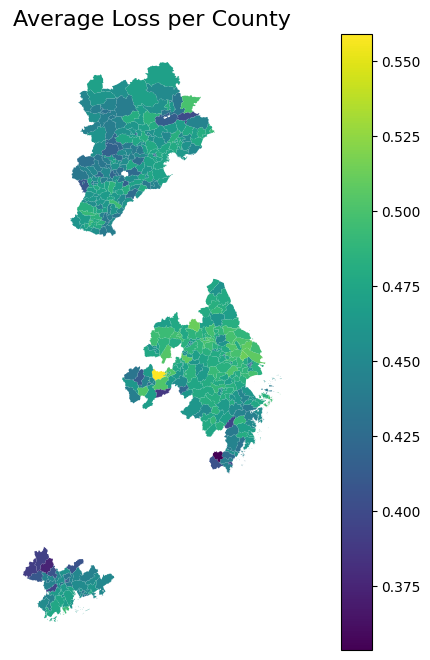

In [12]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from shapely.geometry import Point

# 文件路径
county_shp_path = "/home/liyong/code/CityHomogeneity/data/UrbanBoundaries/preprocess_city49/merged_with_boundaries_county.shp"
point_path = "/home/liyong/code/CityHomogeneity/output/baidu/V3/train_loss_feature_allcity_300ep_homogeneity.pkl"

# 读取县级边界数据
county_gdf = gpd.read_file(county_shp_path)

# 读取点数据
point_df = pd.read_pickle(point_path)

# 创建 GeoDataFrame
point_gdf = gpd.GeoDataFrame(
    point_df,
    geometry=[Point(xy) for xy in zip(point_df.longitude, point_df.latitude)],
    crs="EPSG:4326"
)

# 确保坐标系一致
if county_gdf.crs != point_gdf.crs:
    point_gdf = point_gdf.to_crs(county_gdf.crs)

# 计算每个县包含的点的 loss 平均值
county_with_loss = gpd.sjoin(point_gdf, county_gdf, how="inner", predicate="intersects")
county_loss_avg = county_with_loss.groupby('index_right')['homogeneity'].mean()

# 将平均 loss 加入到县数据中
county_gdf['avg_homogeneity'] = county_gdf.index.map(county_loss_avg)

# 将 NaN 填充为 0（无点数据的区域）
county_gdf['avg_homogeneity'] = county_gdf['avg_homogeneity'].fillna(0)

# 可视化
fig, ax = plt.subplots(figsize=(12, 8))
county_gdf.plot(column='avg_homogeneity', cmap='viridis', legend=True, ax=ax)
ax.set_title("Average Loss per County", fontsize=16)
ax.axis('off')
plt.show()


In [13]:
# 保存带有 avg_loss 列的县级 GeoDataFrame
output_path = "/home/liyong/code/CityHomogeneity/output/baidu/V3/visresult/county_with_avg_homogeneity.shp"
county_gdf.to_file(output_path)

print(f"County GeoDataFrame with avg_loss saved to {output_path}")


/tmp/ipykernel_107608/1543828.py:3: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  county_gdf.to_file(output_path)


County GeoDataFrame with avg_loss saved to /home/liyong/code/CityHomogeneity/output/baidu/V3/visresult/county_with_avg_homogeneity.shp


# cls

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

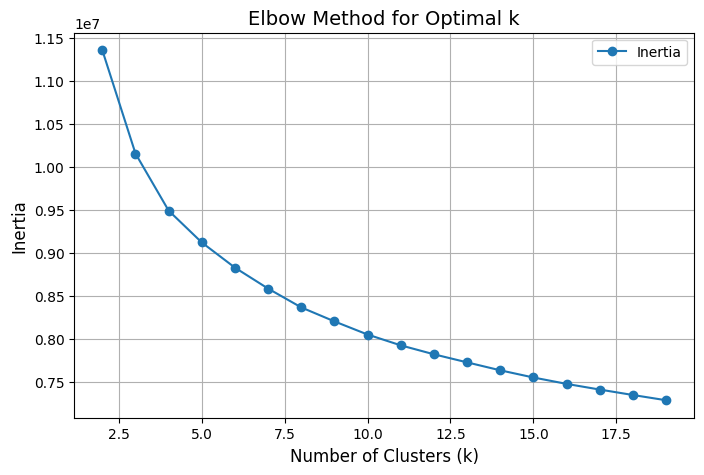

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load the data
existing_gdf = pd.read_pickle("/home/liyong/code/CityHomogeneity/output/baidu/V3/train_loss_and_feature_with_city_gridID.pkl")

# Group by gridID to calculate feature mean for each grid
grid_feature_means = existing_gdf.groupby("gridID")[["feature_" + str(i) for i in range(384)]].mean()

# Scale the features for clustering
scaler = StandardScaler()
features_scaled = scaler.fit_transform(grid_feature_means)

# Compute inertia for different cluster numbers
inertia = []
K = range(2, 20)  # Try between 2 and 20 clusters
for k in K:
    print(k)
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features_scaled)
    inertia.append(kmeans.inertia_)

# Plot the Elbow graph
plt.figure(figsize=(8, 5))
plt.plot(K, inertia, 'o-', label='Inertia')
plt.title('Elbow Method for Optimal k', fontsize=14)
plt.xlabel('Number of Clusters (k)', fontsize=12)
plt.ylabel('Inertia', fontsize=12)
plt.grid(True)
plt.legend()
plt.show()


In [ ]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# 加载特征和损失数据
data_path = "/home/liyong/code/CityHomogeneity/output/baidu/V3/train_loss_and_feature_with_city_gridID.pkl"
data = pd.read_pickle(data_path)

# 提取特征和 loss 列
features = data.loc[:, 'feature_0':'feature_383'].values  # 假设特征列为 feature_0 到 feature_383
loss = data['loss'].values

# 特征归一化
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# 聚类分析（使用 KMeans）
k = 100  # 聚类类别数
kmeans = KMeans(n_clusters=k, random_state=42)
data['cluster'] = kmeans.fit_predict(features_scaled)

# 计算每个类别的数量和平均 loss
cluster_stats = data.groupby('cluster').agg(
    count=('loss', 'size'),
    avg_loss=('loss', 'mean')
).reset_index()

# 输出聚类统计结果
print(cluster_stats)

# 可视化类别数量和平均 loss 的关系
plt.figure(figsize=(10, 6))
plt.scatter(cluster_stats['count'], cluster_stats['avg_loss'], c=cluster_stats['cluster'], cmap='viridis', s=100)
plt.colorbar(label='Cluster')
plt.title("Cluster Size vs. Average Loss", fontsize=14)
plt.xlabel("Cluster Size (Number of Street Scenes)", fontsize=12)
plt.ylabel("Average Reconstruction Loss", fontsize=12)
plt.grid(True)
plt.show()


In [ ]:
import os
import shutil
import pandas as pd
import numpy as np

# 文件路径
input_file = "/home/liyong/code/CityHomogeneity/output/baidu/V3/test_loss_feature_allcity_300ep.pkl"
output_folder = "/home/liyong/code/CityHomogeneity/output/baidu/V3/visresult/Fig_2"
image_base_path = "/data_ssd/"

# 创建输出文件夹
os.makedirs(output_folder, exist_ok=True)

# 读取数据
df = pd.read_pickle(input_file)

# 筛选城市为上海的数据
shanghai_df = df[df["city"] == "shanghai"]

# 保留 loss 一位小数
shanghai_df["loss_rounded"] = shanghai_df["loss"].round(1)

# 为每个唯一 loss_rounded 随机选择一个样本
unique_losses = shanghai_df["loss_rounded"].unique()
selected_images = []

for loss in unique_losses:
    subset = shanghai_df[shanghai_df["loss_rounded"] == loss]
    selected_row = subset.sample(1).iloc[0]  # 随机取一行
    selected_images.append({
        "loss": loss,
        "path": os.path.join(image_base_path, selected_row["path"])  # 完整路径
    })

# 复制文件到目标文件夹，并命名为 loss 值
for item in selected_images:
    src = item["path"]
    dest = os.path.join(output_folder, f"{item['loss']}.jpg")
    try:
        shutil.copy(src, dest)
        print(f"Copied: {src} -> {dest}")
    except Exception as e:
        print(f"Failed to copy {src} -> {dest}. Error: {e}")

print("文件复制完成！")


/tmp/ipykernel_30363/835090110.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shanghai_df["loss_rounded"] = shanghai_df["loss"].round(1)


Copied: /data_ssd/BaiduSVs/images/YRD27/shanghai/59214_121.352774248,31.2845324201_201709_92.2.jpg -> /home/liyong/code/CityHomogeneity/output/baidu/V3/visresult/Fig_2/4.2.jpg
Copied: /data_ssd/BaiduSVs/images/YRD27/shanghai/443469_121.388544902,31.0016692913_201905_260.82.jpg -> /home/liyong/code/CityHomogeneity/output/baidu/V3/visresult/Fig_2/4.0.jpg
Copied: /data_ssd/BaiduSVs/images/YRD27/shanghai/215376_121.315682784,31.7173800618_201403_29.75.jpg -> /home/liyong/code/CityHomogeneity/output/baidu/V3/visresult/Fig_2/4.1.jpg
Copied: /data_ssd/BaiduSVs/images/YRD27/shanghai/319020_121.51669482,31.3072972333_201905_248.56.jpg -> /home/liyong/code/CityHomogeneity/output/baidu/V3/visresult/Fig_2/4.3.jpg
Copied: /data_ssd/BaiduSVs/images/YRD27/shanghai/309687_121.446820607,31.3198994453_202002_75.24.jpg -> /home/liyong/code/CityHomogeneity/output/baidu/V3/visresult/Fig_2/4.4.jpg
Copied: /data_ssd/BaiduSVs/images/YRD27/shanghai/171328_121.775103789,31.5142655257_201403_122.29.jpg -> /home/

# Fig S

/tmp/ipykernel_19479/1022938821.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['std_cluster_size'] = filtered_data['cluster_sizes'].apply(


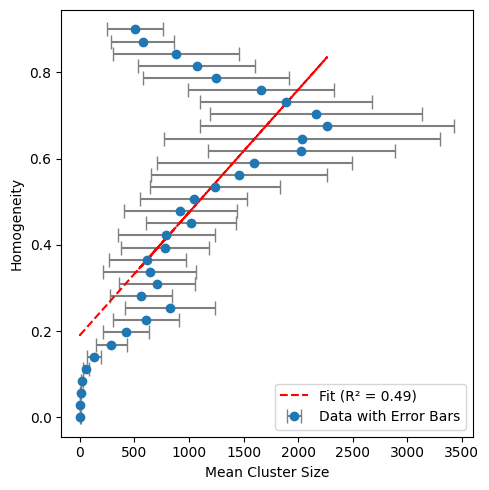

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from scipy.stats import t

# File path
file_path = "/home/liyong/code/CityHomogeneity/output/baidu/V3/Sceneclassification/csv/train_homogeneity/allcity_train_0.02_cluster_sizes.csv"

# Load the data
data = pd.read_csv(file_path)

# Filter data where step == 11
filtered_data = data[data['step'] == 35]

# Calculate the standard deviation of cluster sizes for each row if not already done
if 'std_cluster_size' not in filtered_data.columns:
    filtered_data['std_cluster_size'] = filtered_data['cluster_sizes'].apply(
        lambda x: np.std(eval(x)) if isinstance(x, str) else np.nan
    )

# Filter data where 'lower_bound' is >= 0.4
filtered_data = filtered_data[filtered_data['lower_bound'] <= 0.65].copy()
filtered_data['normalized_lower_bound']=filtered_data['lower_bound'] 
# # Normalize 'lower_bound' to the range [0.3, 1]
filtered_data['normalized_lower_bound'] =  (
    (filtered_data['lower_bound'] - filtered_data['lower_bound'].min()) /
    (filtered_data['lower_bound'].max() - filtered_data['lower_bound'].min())
) * (0.9)

# Prepare data for fitting
X = filtered_data['mean_cluster_size'].values.reshape(-1, 1)  # Independent variable
y = filtered_data['normalized_lower_bound'].values  # Dependent variable

# Fit a linear regression model
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)  # Predicted values

# Calculate R²
r2 = r2_score(y, y_pred)

# Confidence interval calculation
n = len(y)  # Number of data points
p = 1  # Number of predictors
df = n - p - 1  # Degrees of freedom
t_value = t.ppf(0.975, df)  # Two-tailed 95% confidence interval
se = np.sqrt(np.sum((y - y_pred) ** 2) / df)  # Standard error of the regression
X_mean = np.mean(X)
confidence_interval = t_value * se * np.sqrt(1 / n + ((X - X_mean) ** 2 / np.sum((X - X_mean) ** 2)))

# Plot data with confidence interval and standard deviation of cluster sizes as error bars
plt.figure(figsize=(5, 5))

# Scatter plot with error bars
plt.errorbar(
    filtered_data['mean_cluster_size'],
    filtered_data['normalized_lower_bound'],
    xerr=filtered_data['std_cluster_size'],
    fmt='o',
    ecolor='gray',
    capsize=5,
    label='Data with Error Bars'
)

# Add the fitted regression line
plt.plot(
    filtered_data['mean_cluster_size'],
    y_pred,
    label=f'Fit (R² = {r2:.2f})',
    color='red',
    linestyle='--'
)

# # Add the confidence interval
# plt.fill_between(
#     filtered_data['mean_cluster_size'],
#     y_pred - confidence_interval.flatten(),
#     y_pred + confidence_interval.flatten(),
#     color='red',
#     alpha=0.2,
#     label='95% Confidence Interval'
# )

# Labels and legend
plt.xlabel('Mean Cluster Size')
plt.ylabel('Homogeneity')
plt.grid(False)
plt.legend()

# # Export to PDF
# output_pdf_path = "/home/liyong/code/CityHomogeneity/output/baidu/V3/visresult/Fig_1/mean_cluster_homo_allcity.pdf"
# plt.savefig(output_pdf_path, format='pdf')
plt.tight_layout()
plt.show()

/tmp/ipykernel_19479/1418828165.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['std_cluster_size'] = filtered_data['cluster_sizes'].apply(


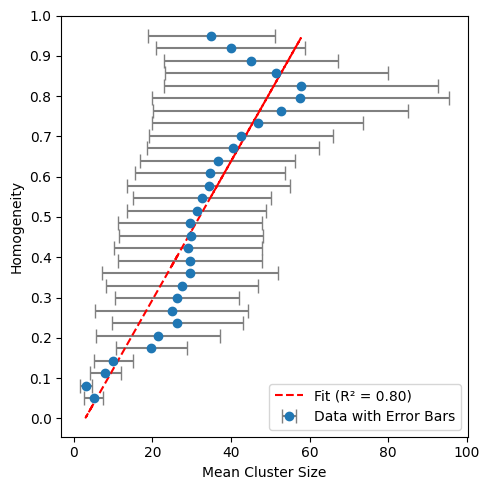

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from scipy.stats import t

# File path
file_path = "/home/liyong/code/CityHomogeneity/output/baidu/V3/Sceneclassification/csv/train_homogeneity/allcity_train_0.02_cluster_sizes.csv"

# Load the data
data = pd.read_csv(file_path)

# Filter data where step == 11
distance = 5
filtered_data = data[data['step'] == distance]

# Calculate the standard deviation of cluster sizes for each row if not already done
if 'std_cluster_size' not in filtered_data.columns:
    filtered_data['std_cluster_size'] = filtered_data['cluster_sizes'].apply(
        lambda x: np.std(eval(x)) if isinstance(x, str) else np.nan
    )

# Filter data where 'lower_bound' is >= 0.4
filtered_data = filtered_data[(filtered_data['upper_bound'] <= 0.6) & (filtered_data['upper_bound'] >= 0.)].copy()
# filtered_data['normalized_upper_bound']=filtered_data['upper_bound'] 
# # Normalize 'lower_bound' to the range [0.3, 1]
filtered_data['normalized_upper_bound'] = 0.05+ (
    (filtered_data['upper_bound'] - filtered_data['upper_bound'].min()) /
    (filtered_data['upper_bound'].max() - filtered_data['upper_bound'].min())
) * (0.9)

# Prepare data for fitting
X = filtered_data['mean_cluster_size'].values.reshape(-1, 1)  # Independent variable
y = filtered_data['normalized_upper_bound'].values  # Dependent variable

# Fit a linear regression model
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)  # Predicted values

# Calculate R²
r2 = r2_score(y, y_pred)

# Confidence interval calculation
n = len(y)  # Number of data points
p = 1  # Number of predictors
df = n - p - 1  # Degrees of freedom
t_value = t.ppf(0.975, df)  # Two-tailed 95% confidence interval
se = np.sqrt(np.sum((y - y_pred) ** 2) / df)  # Standard error of the regression
X_mean = np.mean(X)
confidence_interval = t_value * se * np.sqrt(1 / n + ((X - X_mean) ** 2 / np.sum((X - X_mean) ** 2)))

# Plot data with confidence interval and standard deviation of cluster sizes as error bars
plt.figure(figsize=(5, 5))

# Scatter plot with error bars
plt.errorbar(
    filtered_data['mean_cluster_size'],
    filtered_data['normalized_upper_bound'],
    xerr=filtered_data['std_cluster_size'],
    fmt='o',
    ecolor='gray',
    capsize=5,
    label='Data with Error Bars'
)

# Add the fitted regression line
plt.plot(
    filtered_data['mean_cluster_size'],
    y_pred,
    label=f'Fit (R² = {r2:.2f})',
    color='red',
    linestyle='--'
)

# Add the confidence interval
# plt.fill_between(
#     filtered_data['mean_cluster_size'],
#     y_pred - confidence_interval.flatten(),
#     y_pred + confidence_interval.flatten(),
#     color='red',
#     alpha=0.2,
#     label='95% Confidence Interval'
# )

# Labels and legend
plt.yticks([i/10 for i in range(0, 11)])  # 0 到 1，间隔 0.1
plt.xlabel('Mean Cluster Size')
plt.ylabel('Homogeneity')
plt.grid(False)
plt.legend()

# Export to PDF
output_pdf_path = f"/home/liyong/code/CityHomogeneity/output/baidu/V3/visresult/Fig_1/mean_cluster_upper_homo_allcity_{distance}.pdf"
plt.savefig(output_pdf_path, format='pdf')
plt.tight_layout()
plt.show()

/tmp/ipykernel_19479/3845514337.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['std_cluster_size'] = filtered_data['cluster_sizes'].apply(
/tmp/ipykernel_19479/3845514337.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['std_cluster_size'] = filtered_data['cluster_sizes'].apply(
/tmp/ipykernel_19479/3845514337.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See th

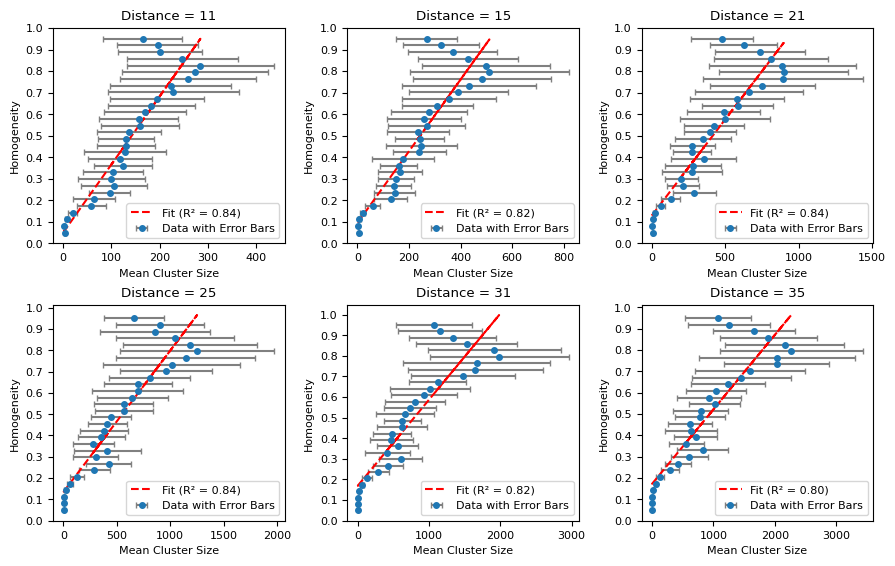

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from scipy.stats import t

# 设置字体大小为8pt
plt.rcParams.update({'font.size': 8})

# 定义绘图函数
def plot_homogeneity_vs_cluster_size(data, distance, ax):
    try:
        # 过滤数据
        filtered_data = data[data['step'] == distance]

        # 如果数据为空，跳过绘制
        if len(filtered_data) == 0:
            ax.set_title(f'Distance = {distance} (No Data)')
            return

        # 计算 cluster_sizes 的标准差
        if 'std_cluster_size' not in filtered_data.columns:
            filtered_data['std_cluster_size'] = filtered_data['cluster_sizes'].apply(
                lambda x: np.std(eval(x)) if isinstance(x, str) else np.nan
            )

        # 过滤 upper_bound 在 [0, 0.6] 范围内的数据
        filtered_data = filtered_data[(filtered_data['upper_bound'] <= 0.6) & (filtered_data['upper_bound'] >= 0.)].copy()

        # 归一化 upper_bound 到 [0.05, 0.95]
        filtered_data['normalized_upper_bound'] = 0.05 + (
            (filtered_data['upper_bound'] - filtered_data['upper_bound'].min()) /
            (filtered_data['upper_bound'].max() - filtered_data['upper_bound'].min())
        ) * 0.9

        # 准备数据
        X = filtered_data['mean_cluster_size'].values.reshape(-1, 1)  # 自变量
        y = filtered_data['normalized_upper_bound'].values  # 因变量

        # 拟合线性回归模型
        model = LinearRegression()
        model.fit(X, y)
        y_pred = model.predict(X)  # 预测值

        # 计算 R²
        r2 = r2_score(y, y_pred)

        # 绘制散点图和误差条
        ax.errorbar(
            filtered_data['mean_cluster_size'],
            filtered_data['normalized_upper_bound'],
            xerr=filtered_data['std_cluster_size'],
            fmt='o',
            ecolor='gray',
            capsize=2,
            label='Data with Error Bars',
            markersize=4  # 设置散点大小
        )

        # 绘制回归线
        ax.plot(
            filtered_data['mean_cluster_size'],
            y_pred,
            label=f'Fit (R² = {r2:.2f})',
            color='red',
            linestyle='--'
        )

        # 设置 y 轴刻度
        ax.set_yticks([i / 10 for i in range(0, 11)])  # 0 到 1，间隔 0.1

        # 设置标题和标签
        ax.set_title(f'Distance = {distance}')
        ax.set_xlabel('Mean Cluster Size')
        ax.set_ylabel('Homogeneity')
        ax.grid(False)  # 添加网格线
        ax.legend()

    except Exception as e:
        print(f"Error plotting distance {distance}: {e}")
        ax.set_title(f'Distance = {distance} (Error)')

# 文件路径
file_path = "/home/liyong/code/CityHomogeneity/output/baidu/V3/Sceneclassification/csv/train_homogeneity/allcity_train_0.02_cluster_sizes.csv"

# 加载数据
data = pd.read_csv(file_path)

# 创建 2x3 的子图
fig, axes = plt.subplots(2, 3, figsize=(9, 6))
# fig.suptitle('Homogeneity vs Mean Cluster Size for Different Distances')

# 遍历不同的距离并绘制子图
distances = [11, 15, 21, 25, 31, 35]
for i, distance in enumerate(distances):
    ax = axes[i // 3, i % 3]  # 确定子图位置
    plot_homogeneity_vs_cluster_size(data, distance, ax)

# 调整布局
plt.tight_layout()
plt.subplots_adjust(top=0.9)  # 调整顶部间距

# 导出为 PDF
output_pdf_path = "/home/liyong/code/CityHomogeneity/output/baidu/V3/visresult/Fig_1/mean_cluster_upper_homo_allcity_multiple_distances.pdf"
plt.savefig(output_pdf_path, format='pdf')

# 显示图形
plt.show()

## 示例图

Dendrogram saved as /home/liyong/code/CityHomogeneity/output/baidu/V3/visresult/Fig_1/dendrogram_10.pdf


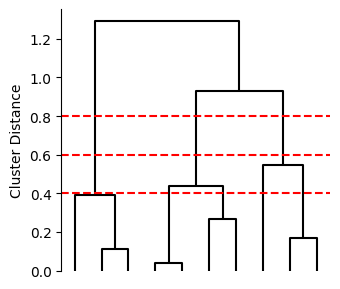

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

# 生成示例数据
np.random.seed(42)
data = np.random.rand(10, 2)  # 10个点，每个点有2个特征

# 计算层次聚类
Z = linkage(data, method='ward')  # 使用Ward方法计算链接矩阵

# 绘制dendrogram
plt.figure(figsize=(3.5, 3))
dendrogram(Z, above_threshold_color='black', color_threshold=0)



# 添加水平线（如y1, y2, y3）
y1, y2, y3 = 0.4, 0.6, 0.8  # 示例y值
plt.axhline(y=y1, color='red', linestyle='--', label=f'y1={y1}')
plt.axhline(y=y2, color='red', linestyle='--', label=f'y2={y2}')
plt.axhline(y=y3, color='red', linestyle='--', label=f'y3={y3}')

# 设置标签
plt.xlabel("Data Points")
plt.ylabel("Cluster Distance")
# plt.title("Dendrogram with Threshold Lines")
# plt.legend()


# 去掉横轴和横轴线
plt.xticks([])
plt.gca().xaxis.set_visible(False)
plt.gca().yaxis.set_visible(False)

# 去掉图框（边框）
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(True)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().yaxis.set_visible(True)

# 显示图像
plt.tight_layout()


# 保存为PDF文件
output_path = "/home/liyong/code/CityHomogeneity/output/baidu/V3/visresult/Fig_1/dendrogram_10.pdf"
plt.tight_layout()
plt.savefig(output_path, format='pdf')
print(f"Dendrogram saved as {output_path}")
plt.show()


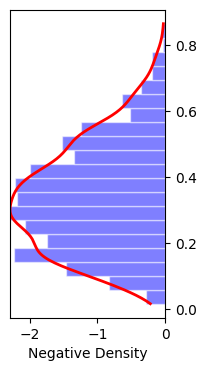

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# 1. 生成偏右分布数据（使用 Beta 分布 a=2, b=5）
np.random.seed(0)
data = np.random.beta(a=2.5, b=5, size=1000)

# 2. 创建画布
fig, ax = plt.subplots(figsize=(2, 4))

# 3. 绘制直方图（值为负，向左延伸）
counts, bins, patches = ax.hist(data, bins=20, density=True, 
                                alpha=0.5, color='blue', edgecolor='white', 
                                orientation='horizontal')

# 4. 手动将直方图的宽度设置为负值
for patch in patches:
    patch.set_width(-patch.get_width())  # 使直方图的宽度为负

# 5. 计算核密度估计
kde = gaussian_kde(data)
x_vals = np.linspace(min(data), max(data), 200)
y_vals = kde(x_vals)

# 6. 绘制平滑曲线（向左延伸）
ax.plot(-y_vals, x_vals, color='red', linewidth=2)  # 负号确保曲线向左

# 7. 移动 Y 轴到右侧
ax.yaxis.tick_right()
ax.yaxis.set_label_position("right")

# 8. 设置标题和标签
# ax.set_title("Right-Skewed Negative Histogram with KDE (Left Rotated)")
ax.set_xlabel("Negative Density")
# ax.set_ylabel("Value")
ax.set_xlim(-max(y_vals), 0)  # 调整 X 轴范围

# 9. 显示图像
plt.show()


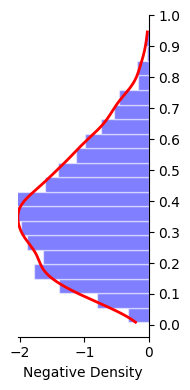

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# 1. 生成偏右分布数据（使用 Beta 分布 a=2, b=5）
np.random.seed(0)
data = np.random.beta(a=2.2, b=3.8, size=2000)

# 2. 创建画布
fig, ax = plt.subplots(figsize=(2, 4))


# 3. 绘制直方图（值为负，向左延伸）
counts, bins, patches = ax.hist(data, bins=20, density=True, 
                                alpha=0.5, color='blue', edgecolor='white', 
                                orientation='horizontal')

# 4. 手动将直方图的宽度设置为负值
for patch in patches:
    patch.set_width(-patch.get_width())  # 使直方图的宽度为负

# 5. 计算核密度估计
kde = gaussian_kde(data)
x_vals = np.linspace(min(data), max(data), 200)
y_vals = kde(x_vals)

# 6. 绘制平滑曲线（向左延伸）
ax.plot(-y_vals, x_vals, color='red', linewidth=2)  # 负号确保曲线向左

# 7. 设置纵轴刻度单位为 0.1
ax.set_yticks(np.arange(0, 1.1, 0.1))

# 8. 移动 Y 轴到右侧
ax.yaxis.tick_right()
ax.yaxis.set_label_position("right")

# 9. 去掉周围边框（仅保留左边和底部轴线）
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(True)
ax.spines['bottom'].set_visible(True)

# 10. 设置标题和标签
# ax.set_title("Right-Skewed Negative Histogram with KDE (Left Rotated)")
ax.set_xlabel("Negative Density")
# ax.set_ylabel("Value")
ax.set_xlim(-max(y_vals), 0)  # 调整 X 轴范围
output_path = "/home/liyong/code/CityHomogeneity/output/baidu/V3/visresult/Fig_1/dis_loss.pdf"
plt.tight_layout()
plt.savefig(output_path, format='pdf')
# 11. 显示图像
plt.show()
